In [1]:
#Group all messages by day since the start of the training
import os, sys
import re
import json
import glob

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict
from datetime import datetime
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
rpath = os.path.abspath('./..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils
from src.utils import get_messages_timestamp_from_channel,from_msg_get_replies_text_with_specific_date

In [17]:
import datetime
from collections import defaultdict

data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()
all_messages_from_channels = defaultdict(list)

for channel in channels_data:
    path_channel = f"../dataset/{channel['name']}"
    all_messages = get_messages_timestamp_from_channel(path_channel)
    for date, messages in all_messages.items():
        all_messages_from_channels[date[:10]].append(messages)

for date, list_of_messages in all_messages_from_channels.items():
    date = datetime.datetime.fromtimestamp(int(date))
    formatted_date = date.strftime("%B %d, %Y %H:%M:%S")
    print("Date:", formatted_date)
    for message in list_of_messages:
        print(message)
    print()

Date: November 22, 2022 13:02:28
['<!channel> Where exactly can I find the certificate?']

Date: November 22, 2022 13:03:23
['Same here']

Date: November 22, 2022 13:41:15
['We will be emailing them out early next week']

Date: November 22, 2022 13:41:19
['<@U03T89ACUUW> is off this week']

Date: November 22, 2022 13:43:06
['Okay thanks']

Date: August 18, 2022 17:32:32
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']

Date: August 18, 2022 17:42:00
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']

Date: 

In [23]:
#Concatenate all messages and replies in the same day as one big text

from collections import defaultdict
data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()
all_messages_and_replies_from_channels = defaultdict(list)

for channel in channels_data:

    path_channel = f"../dataset/{channel['name']}"
    all_messages = get_messages_timestamp_from_channel(path_channel)
    all_replies = from_msg_get_replies_text_with_specific_date(path_channel)
    for date,messages in all_messages.items():
        all_messages_and_replies_from_channels[date[:10]].append(messages)
    for date,messages in all_replies.items():
        all_messages_and_replies_from_channels[date[:10]].append(messages)

for date, list_of_messages_and_replies in all_messages_and_replies_from_channels.items():
    date = datetime.datetime.fromtimestamp(int(date))
    formatted_date = date.strftime("%B %d, %Y %H:%M:%S")
    print("Date:", formatted_date)
    for message in list_of_messages_and_replies:
        print(message)
    print()


Date: November 22, 2022 13:02:28
['<!channel> Where exactly can I find the certificate?']

Date: November 22, 2022 13:03:23
['Same here']

Date: November 22, 2022 13:41:15
['We will be emailing them out early next week']

Date: November 22, 2022 13:41:19
['<@U03T89ACUUW> is off this week']

Date: November 22, 2022 13:43:06
['Okay thanks']

Date: August 18, 2022 17:32:32
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']
['<@U03U9DB7REG> has joined the channel']

Date: August 18, 2022 17:42:00
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']
['<@U03UKL27B0R> has joined the channel']

Date: 

In [26]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import defaultdict

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ekram/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
#Perform sentimental analysis

def perform_sentiment_analysis(messages):
    sia = SentimentIntensityAnalyzer()
    positive_sentiments = 0
    negative_sentiments = 0
    neutral_sentiments = 0
    
    for message in messages:
        sentiment_scores = sia.polarity_scores(message)
        sentiment_score = sentiment_scores['compound']
        
        if sentiment_score > 0:
            positive_sentiments += 1
        elif sentiment_score < 0:
            negative_sentiments += 1
        else:
            neutral_sentiments += 1
    
    return positive_sentiments, negative_sentiments, neutral_sentiments

data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()
all_messages_and_replies_from_channels = defaultdict(list)

for channel in channels_data:
    path_channel = f"../dataset/{channel['name']}"
    all_messages = get_messages_timestamp_from_channel(path_channel)
    all_replies = from_msg_get_replies_text_with_specific_date(path_channel)
    
    for date, messages in all_messages.items():
        all_messages_and_replies_from_channels[date[:10]].extend(messages)
    for date, replies in all_replies.items():
        all_messages_and_replies_from_channels[date[:10]].extend(replies)

positive_sentiments = {}
negative_sentiments = {}
neutral_sentiments = {}

for date, messages in all_messages_and_replies_from_channels.items():
    positive_count, negative_count, neutral_count = perform_sentiment_analysis(messages)
    positive_sentiments[date] = positive_count
    negative_sentiments[date] = negative_count
    neutral_sentiments[date] = neutral_count

print("Positive Sentiments:")
for date, count in positive_sentiments.items():
    date = datetime.datetime.fromtimestamp(int(date))
    formatted_date = date.strftime("%B %d, %Y %H:%M:%S")
    print(formatted_date, count)

print("Negative Sentiments:")
for date, count in negative_sentiments.items():
    date = datetime.datetime.fromtimestamp(int(date))
    formatted_date = date.strftime("%B %d, %Y %H:%M:%S")
    print(formatted_date, count)

print("Neutral Sentiments:")
for date, count in neutral_sentiments.items():
    date = datetime.datetime.fromtimestamp(int(date))
    formatted_date = date.strftime("%B %d, %Y %H:%M:%S")
    print(formatted_date, count)

Positive Sentiments:
November 22, 2022 13:02:28 0
November 22, 2022 13:03:23 0
November 22, 2022 13:41:15 0
November 22, 2022 13:41:19 0
November 22, 2022 13:43:06 1
August 18, 2022 17:32:32 0
August 18, 2022 17:42:00 0
August 18, 2022 18:58:33 0
August 18, 2022 19:28:06 0
August 18, 2022 23:26:04 0
August 19, 2022 08:49:32 0
November 17, 2022 12:57:41 1
November 17, 2022 13:17:31 1
November 17, 2022 13:17:44 0
November 17, 2022 13:36:54 1
November 17, 2022 13:43:40 0
November 17, 2022 14:25:42 0
November 17, 2022 14:35:54 1
November 17, 2022 14:44:17 0
November 17, 2022 15:09:37 1
November 17, 2022 15:38:39 1
November 17, 2022 16:33:18 0
November 17, 2022 17:44:04 0
November 17, 2022 18:18:55 0
November 17, 2022 18:24:17 1
November 17, 2022 18:31:10 1
November 17, 2022 18:32:01 1
November 17, 2022 18:32:41 0
November 17, 2022 18:32:57 1
November 17, 2022 18:35:01 1
November 17, 2022 18:36:31 1
November 17, 2022 20:22:30 1
November 14, 2022 10:44:49 1
November 06, 2022 17:13:07 0
Novem

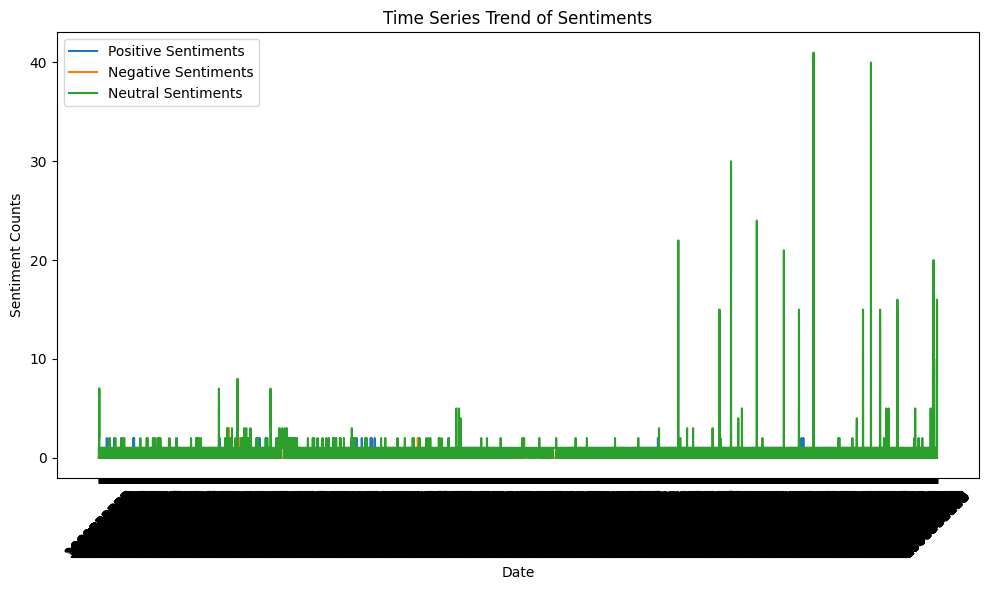

In [28]:
import matplotlib.pyplot as plt

dates = list(positive_sentiments.keys()) 

positive_counts = list(positive_sentiments.values())
negative_counts = list(negative_sentiments.values())
neutral_counts = list(neutral_sentiments.values())

plt.figure(figsize=(10, 6))
plt.plot(dates, positive_counts, label='Positive Sentiments')
plt.plot(dates, negative_counts, label='Negative Sentiments')
plt.plot(dates, neutral_counts, label='Neutral Sentiments')

plt.xlabel('Date')
plt.ylabel('Sentiment Counts')
plt.title('Time Series Trend of Sentiments')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()